In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## House Prices Prediction


**Introdução:** a competição do kaggle trata sobre o uso de variáveis explicativas que descreve vários aspectos de casas resisdenciais em Ames, Iowa, e que nos desafia a prever o preço final de cada casa.

O conjunto de dados nomeado de *Ames Housing Dataset* foi construído por Dean de Cock para o ensino de Ciência de Dados.

**Objetivo:** trabalhar para prver o preço de venda de cada casa. Para cada ID no conjunto de teste, devemos prever o valor da variável ***SalePrice*** do conjunto de teste.

**Métrica:** a avaliação dos envios é feita pela *RMSE (Root-Mean-Squared-Error)*, medindo o logaritmo do valor previsto e o logaritmo do preço de venda real da amostra. Fazer isso significa que erros na previsão de casas caras ou baratas efetarão o resultado igualmente.

**Formato do arquivo de submissão:** o arquivo deve conter um cabeçalho e ter o seguinte formato:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.

```



## Importando as Libs

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import kaggle as kg
#from scikit-learn import

import warnings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

### Lendo o arquivo de treino e teste disponibilizados:


Visualizando as primeiras linhas do arquivo:


In [51]:
treino = pd.read_csv('/train.csv')
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
teste = pd.read_csv('/test.csv')
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [53]:
# removendo a coluna de identificação (Id)

treino.drop('Id', axis=1, inplace=True)
teste.drop('Id', axis=1, inplace=True)

## Campos do conjunto de dados:


* **SalePrice**: preço de venda da propriedade em dólares. Esta é a variável alvo que você está tentando prever.
* **MSSubClass**: Classe do edifício.
* **MSZoning**: Classificação geral de zoneamento.
* **LotFrontage**: Metros lineares de rua conectados à propriedade.
* **LotArea**: Tamanho do lote em pés quadrados.
* **Street**: Tipo de acesso por estrada.
* **Alley**: Tipo de acesso por viela.
* **LotShape**: Formato geral da propriedade.
* **LandContour**: Nivelamento da propriedade.
* **Utilities**: Tipo de utilidades disponíveis.
* **LotConfig**: Configuração do lote.
* **LandSlope**: Inclinação da propriedade.
* **Neighborhood**: Localização física dentro dos limites da cidade de Ames.
* **Condition1**: Proximidade com estrada principal ou ferrovia.
* **Condition2**: Proximidade com estrada principal ou ferrovia (se houver uma segunda).
* **BldgType**: Tipo de habitação.
* **HouseStyle**: Estilo da habitação.
* **OverallQual**: Qualidade geral dos materiais e acabamentos.
* **OverallCond**: Avaliação da condição geral.
* **YearBuilt**: Data de construção original.
* **YearRemodAdd**: Data da reforma.
* **RoofStyle**: Tipo de telhado.
* **RoofMatl**: Material do telhado.
* **Exterior1st**: Revestimento exterior da casa.
* **Exterior2nd**: Revestimento exterior da casa (se houver mais de um material).
* **MasVnrType**: Tipo de revestimento em alvenaria.
* **MasVnrArea**: Área de revestimento em alvenaria em pés quadrados.
* **ExterQual**: Qualidade do material exterior.
* **ExterCond**: Condição atual do material exterior.
* **Foundation**: Tipo de fundação.
* **BsmtQual**: Altura do porão.
* **BsmtCond**: Condição geral do porão.
* **BsmtExposure**: Paredes do porão com saída para o exterior ou nível de jardim.
* **BsmtFinType1**: Qualidade da área acabada do porão.
* **BsmtFinSF1**: Área acabada do tipo 1 em pés quadrados.
* **BsmtFinType2**: Qualidade da segunda área acabada (se presente).
* **BsmtFinSF2**: Área acabada do tipo 2 em pés quadrados.
* **BsmtUnfSF**: Área inacabada do porão em pés quadrados.
* **TotalBsmtSF**: Área total do porão em pés quadrados.
* **Heating**: Tipo de aquecimento.
* **HeatingQC**: Qualidade e condição do aquecimento.
* **CentralAir**: Ar-condicionado central.
* **Electrical**: Sistema elétrico.
* **1stFlrSF**: Área do primeiro andar em pés quadrados.
* **2ndFlrSF**: Área do segundo andar em pés quadrados.
* **LowQualFinSF**: Área acabada de baixa qualidade (todos os andares) em pés quadrados.
* **GrLivArea**: Área útil acima do nível do solo em pés quadrados.
* **BsmtFullBath**: Banheiros completos no porão.
* **BsmtHalfBath**: Lavabos no porão.
* **FullBath**: Banheiros completos acima do nível do solo.
* **HalfBath**: Lavabos acima do nível do solo.
* **Bedroom**: Número de quartos acima do nível do porão.
* **Kitchen**: Número de cozinhas.
* **KitchenQual**: Qualidade da cozinha.
* **TotRmsAbvGrd**: Total de cômodos acima do nível do solo (não inclui banheiros).
* **Functional**: Avaliação da funcionalidade da casa.
* **Fireplaces**: Número de lareiras.
* **FireplaceQu**: Qualidade da lareira.
* **GarageType**: Localização da garagem.
* **GarageYrBlt**: Ano de construção da garagem.
* **GarageFinish**: Acabamento interior da garagem.
* **GarageCars**: Capacidade da garagem em número de carros.
* **GarageArea**: Tamanho da garagem em pés quadrados.
* **GarageQual**: Qualidade da garagem.
* **GarageCond**: Condição da garagem.
* **PavedDrive**: Entrada pavimentada para carros.
* **WoodDeckSF**: Área de deck de madeira em pés quadrados.
* **OpenPorchSF**: Área de varanda aberta em pés quadrados.
* **EnclosedPorch**: Área de varanda fechada em pés quadrados.
* **3SsnPorch**: Área de varanda para três estações em pés quadrados.
* **ScreenPorch**: Área de varanda com tela em pés quadrados.
* **PoolArea**: Área da piscina em pés quadrados.
* **PoolQC**: Qualidade da piscina.
* **Fence**: Qualidade da cerca.
* **MiscFeature**: Característica adicional não coberta em outras categorias.
* **MiscVal**: Valor em dólares da característica adicional.
* **MoSold**: Mês da venda.
* **YrSold**: Ano da venda.
* **SaleType**: Tipo de venda.
* **SaleCondition**: Condição da venda.



## Descrição estatística das variáveis numéricas:

In [54]:
for coluna in treino.select_dtypes(include=['number']).columns:
    print(f"Coluna: {coluna}")
    print(treino[coluna].describe())
    print("-" * 50)

Coluna: MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
--------------------------------------------------
Coluna: LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
--------------------------------------------------
Coluna: LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
--------------------------------------------------
Coluna: OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max     

## Tipagem dos dados:

In [55]:
for coluna, tipo in treino.dtypes.items():
    print(f"{coluna}: {tipo}")

MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
Alley: object
LotShape: object
LandContour: object
Utilities: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int64
Function

## EDA

In [56]:
# selecionando a variável target:

y = treino.SalePrice

In [57]:
# excluindo a variável target do conj. de dados de treino

x = treino.drop(['SalePrice'], axis=1)

In [58]:
x.shape

(1460, 79)

## Investigando colunas com valores faltando:

In [59]:
count_by_column = x.isnull().sum()
percent_by_column = (count_by_column / x.shape[0]) * 100
percent_by_column[percent_by_column > 0].sort_values(ascending=False)

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


Podemos notar no resultado acima, a porcentagem de valores nulos em cada coluna. Existem técnicas para lidar com o problema de dados faltantes, mas o fato é que casos em que faltam dados em mais de 70% da coluna, implica em remoção da mesma pois há pouco informação útil restante em seu conteúdo. Nesse caso, o que acontece para as colunas **PoolQC**, **MiscFeature**, **Alley** e **Fence**.



Para as colunas **MasVnrType**, **FireplaceQu** e **LotFrontage**, vamos estudar seus conteúdos para saber se vale a pena seguir com alguma técnica de imputação de dados ou a exclusão da coluna do conjunto de dados.

In [60]:
x['MasVnrType'].value_counts()

,count
MasVnrType,
BrkFace,445
Stone,128
BrkCmn,15


In [61]:
x['FireplaceQu'].value_counts()

,count
FireplaceQu,
Gd,380
TA,313
Fa,33
Ex,24
Po,20


**Para as duas variáveis categóricas mostradas acima:**

no primeiro caso, **MasVnrType** (tipo de revestimento de alvenaria), variável categórica com mais de 50% de dados faltantes. Se tentarmos imputar dados com base nos dados existentes, tenderíamos a imputar dados com base no valor que mais aperece (moda), o que introduziria viés, causando distorção nos dados.

In [38]:
x['LotFrontage'].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


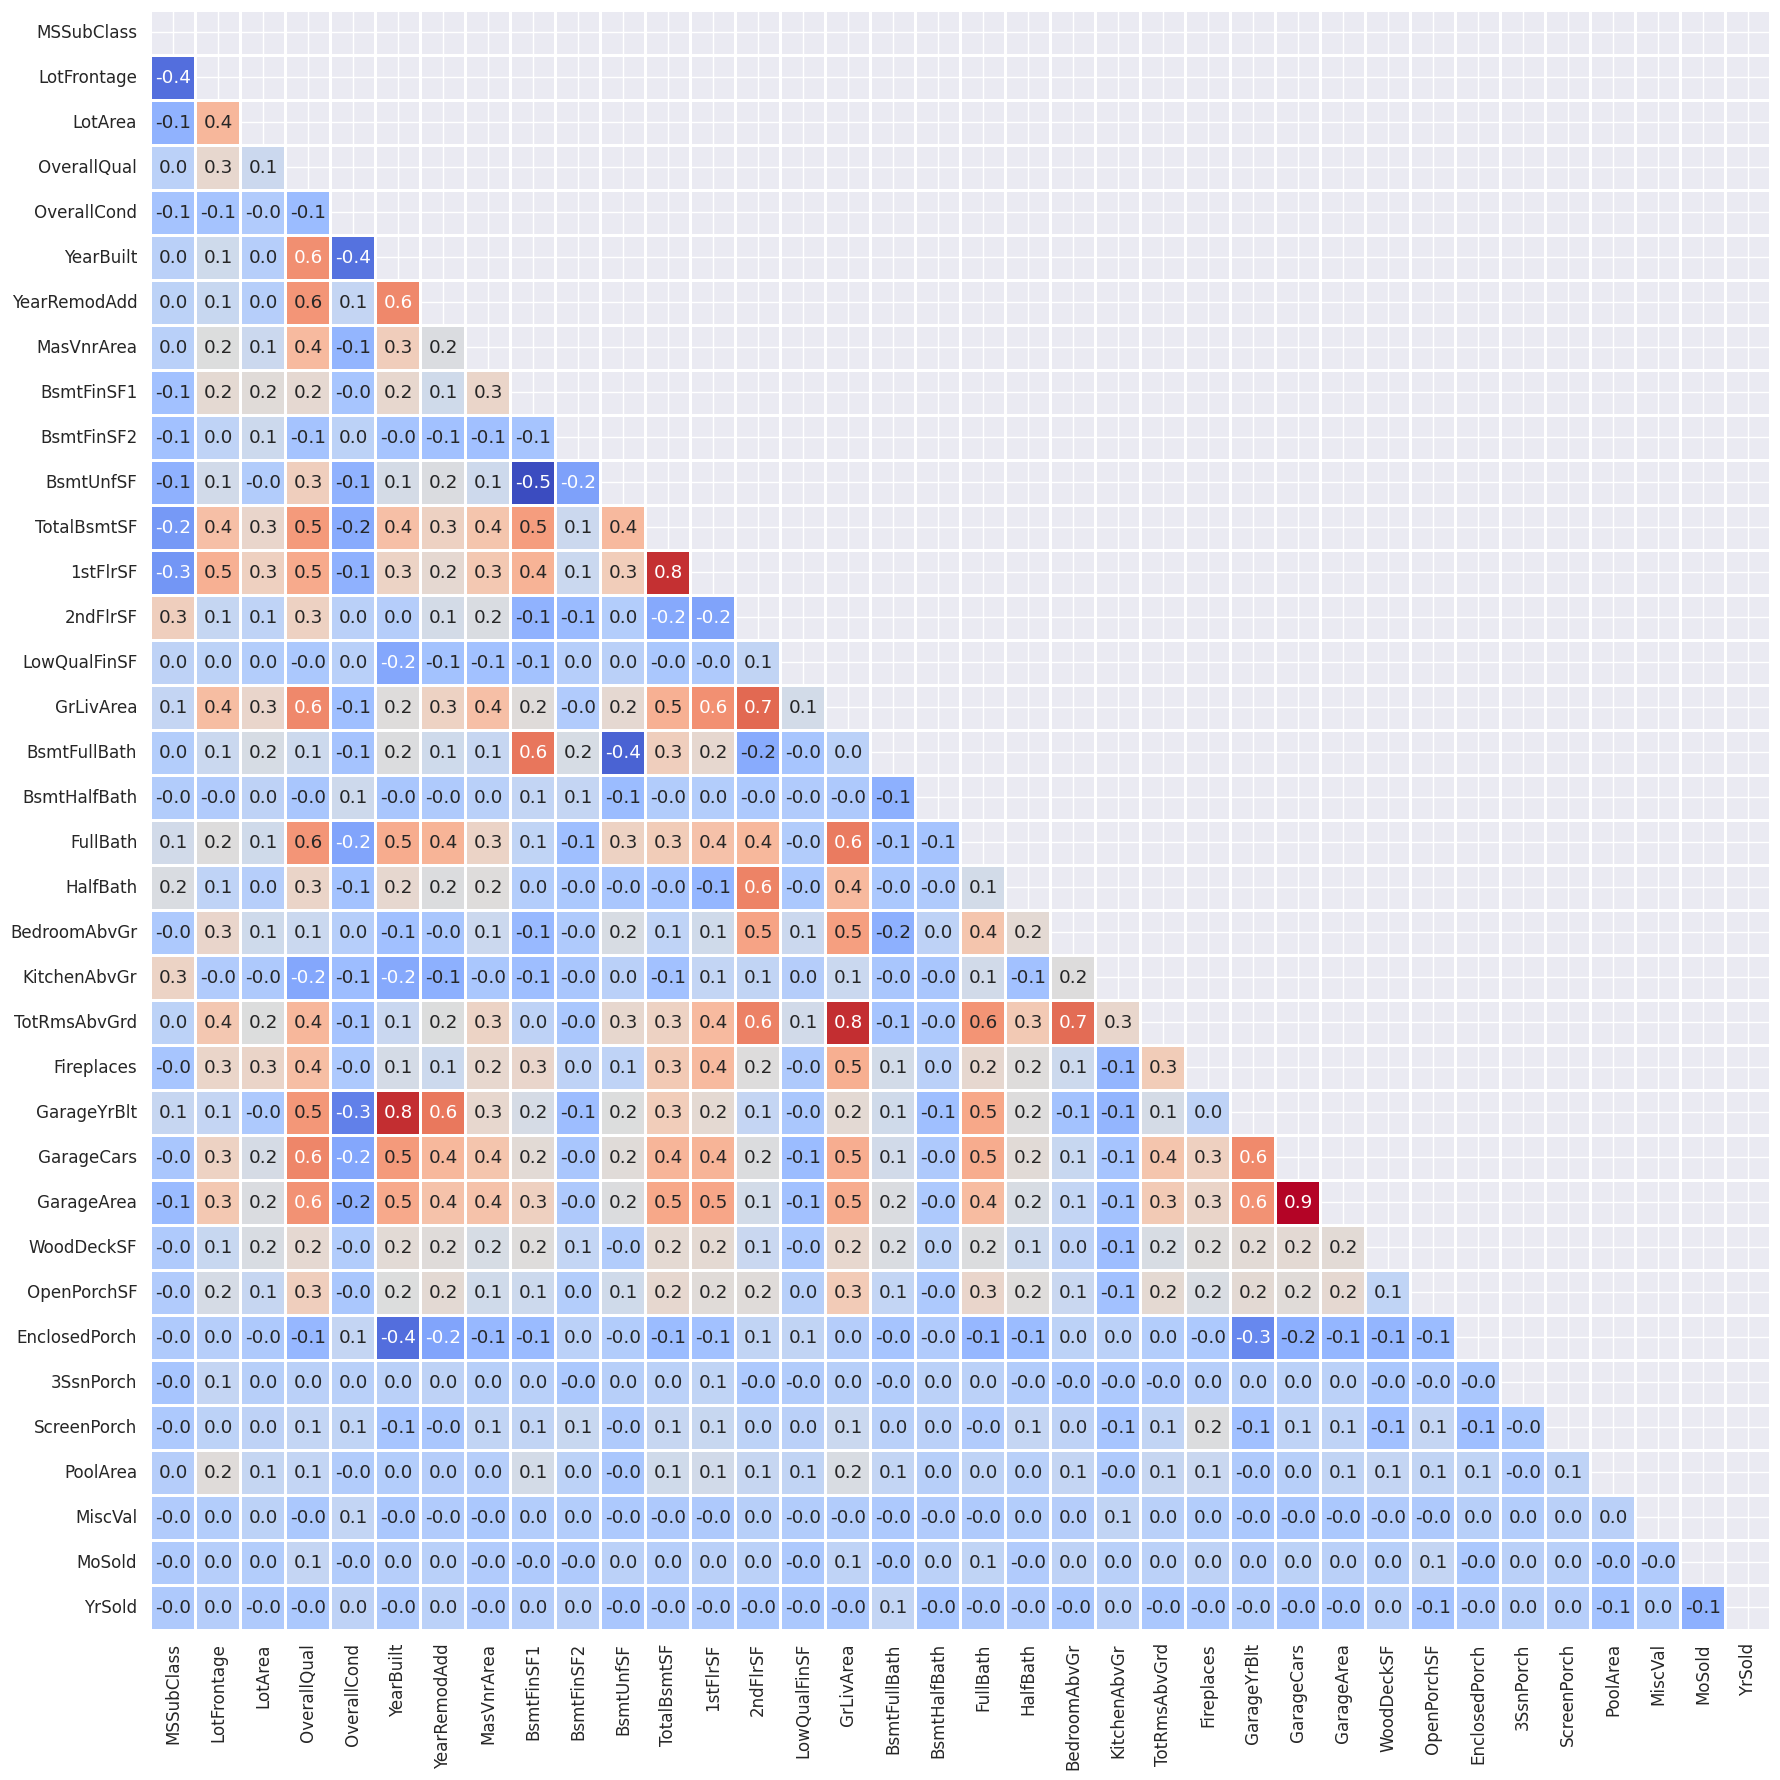

In [62]:
sns.set(font_scale=1.1)
correlation_train = x.corr(numeric_only=True)
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()